In [ ]:
import sys
from gamedata import hard_sales as hs
from typing import Optional, List
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
hard_sales_df = hs.load_hard_sales()

In [3]:
pivot_df = hs.pivot_cumulative_sales_by_hw(hard_sales_df, ['NSW', 'NS2', 'PS5', ''])
pivot_df

hw,NS2,NSW,PS5
report_date,,,
2017-03-05,NaN,330637.0,NaN
2017-03-12,NaN,394057.0,NaN
2017-03-19,NaN,444878.0,NaN
2017-03-26,NaN,524371.0,NaN
2017-04-02,NaN,556633.0,NaN
...,...,...,...
2025-06-22,1241162.0,35778126.0,6902946.0
2025-06-29,1402183.0,35793449.0,6910279.0
2025-07-06,1530826.0,35811161.0,6918908.0


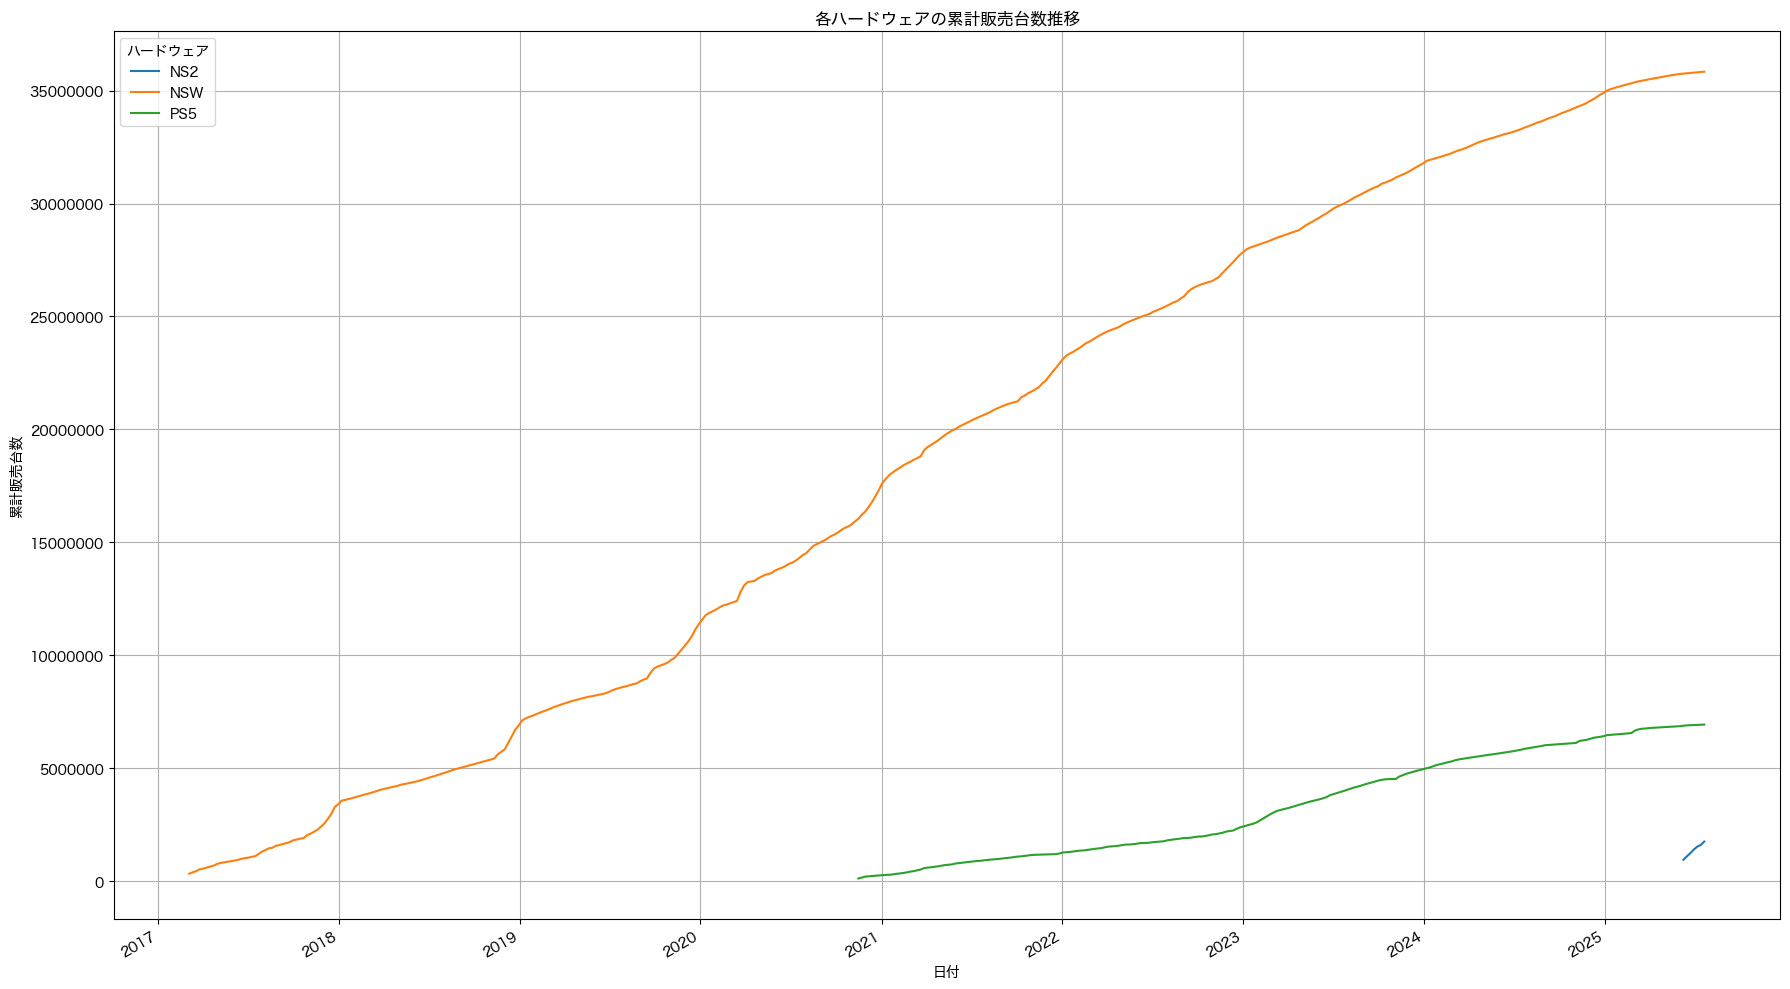

In [4]:


# 4. グラフ描画
plt.figure(figsize=(18, 10))
plt.rcParams['font.family'] = 'Hiragino Sans'  # または 'Hiragino Sans', 'Osaka' など
plt.rcParams['axes.unicode_minus'] = False   # マイナス記号の文字化け防止

pivot_df.plot(ax=plt.gca(), kind='line')
plt.title('各ハードウェアの累計販売台数推移')
plt.xlabel('日付')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')
# plt.gca().set_ylabel('累計販売台数')

# 縦軸の表示を指数表示から整数表示に変更
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
pivot_delta_df = hs.pivot_cumulative_sales_by_delta_week(hard_sales_df, ['NSW', 'NS2', 'PS5', ''])

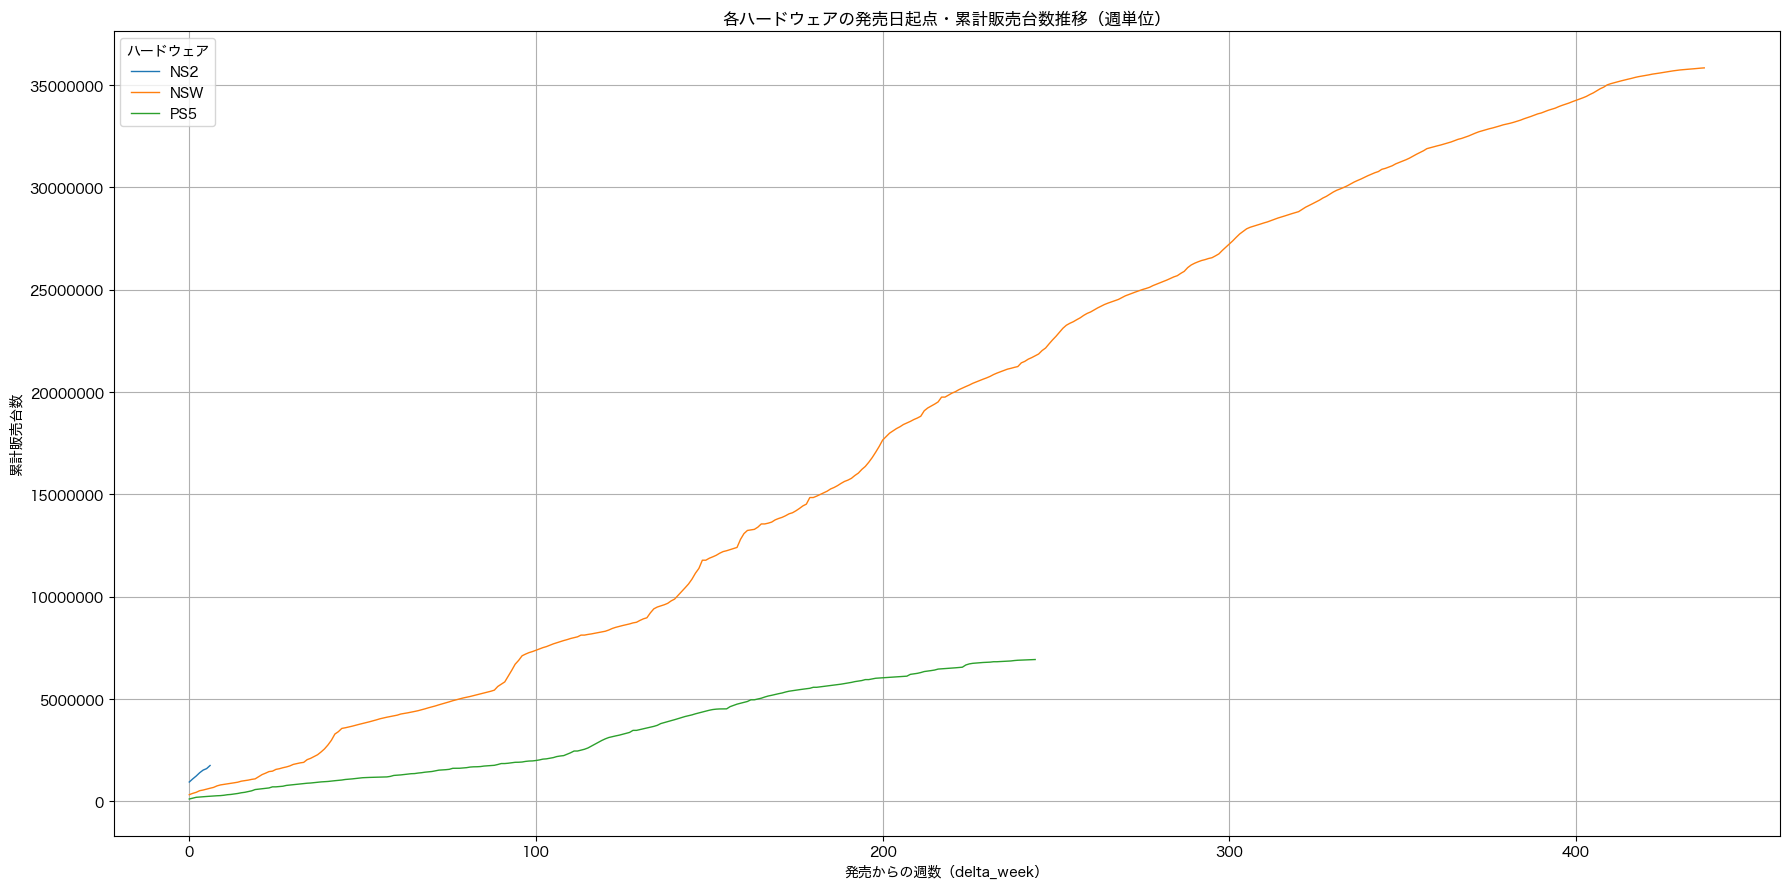

In [6]:
# pivot_delta_dfを使ったグラフ描画（週単位のデルタ表示）
plt.figure(figsize=(18, 9))
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 折れ線グラフ（細い線のみ）
pivot_delta_df.plot(
    ax=plt.gca(),
    kind='line',
    linestyle='-',
    linewidth=1
)

plt.title('各ハードウェアの発売日起点・累計販売台数推移（週単位）')
plt.xlabel('発売からの週数（delta_week）')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')

# 縦軸の表示を指数表示から整数表示に変更
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
delta_recent = pivot_delta_df.head(20)

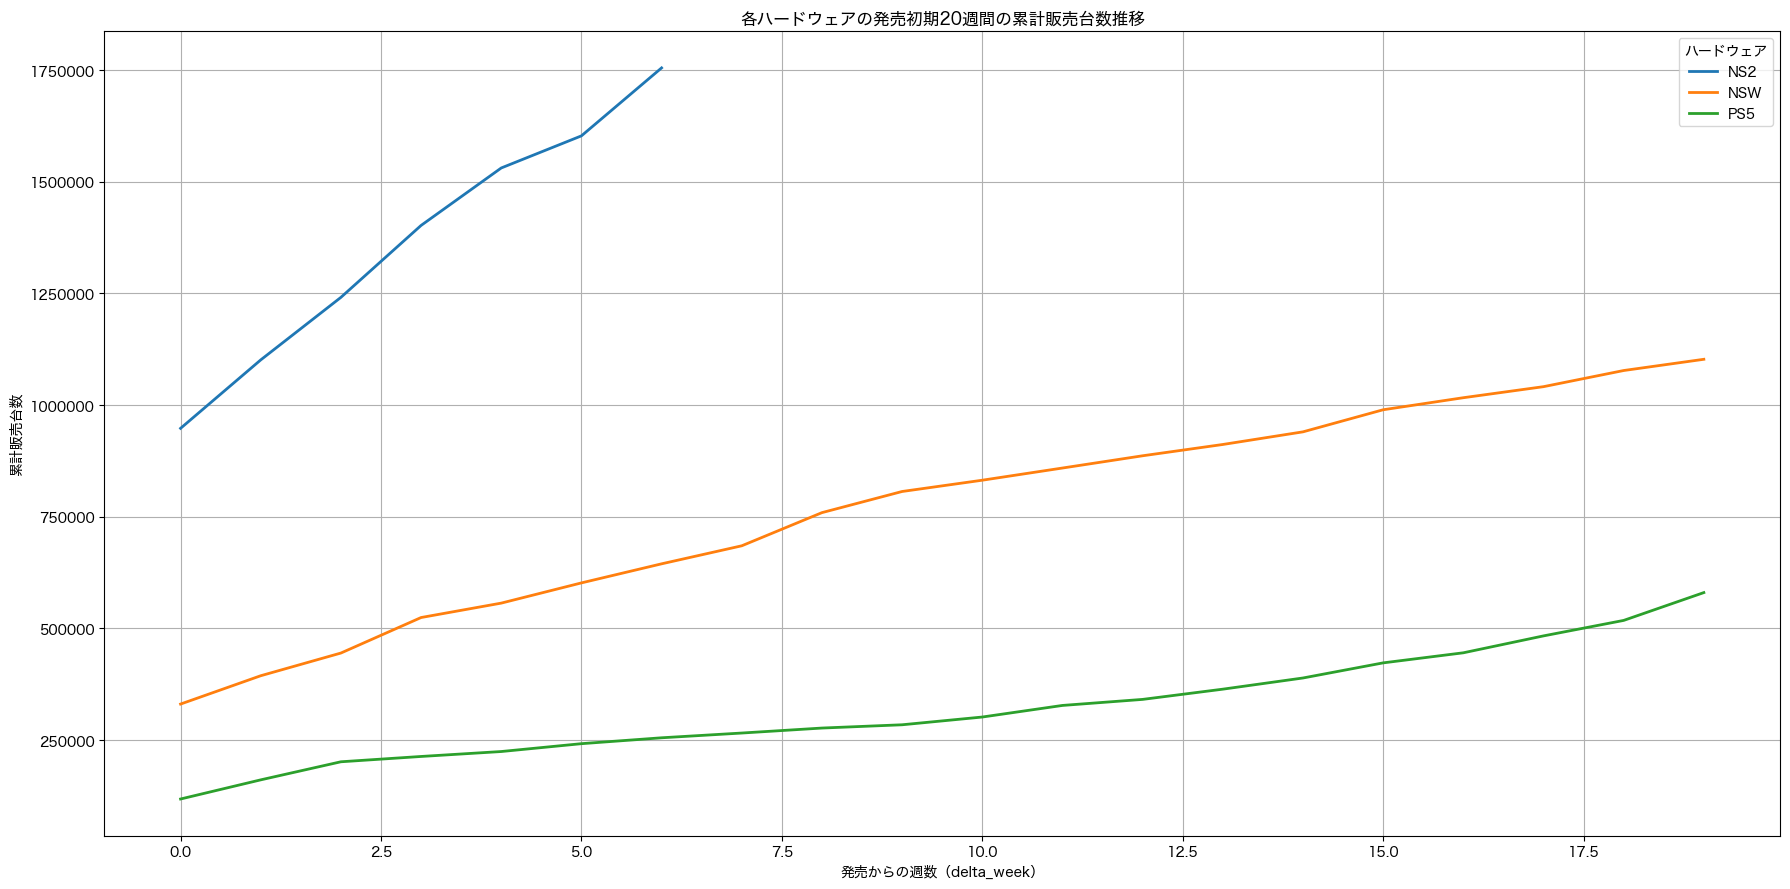

In [8]:
# delta_recentを使ったグラフ描画（発売初期20週間の累計販売台数）
plt.figure(figsize=(18, 9))
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 折れ線グラフ
delta_recent.plot(
    ax=plt.gca(),
    kind='line',
    linestyle='-',
    linewidth=2
)

plt.title('各ハードウェアの発売初期20週間の累計販売台数推移')
plt.xlabel('発売からの週数（delta_week）')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')

# 縦軸の表示を指数表示から整数表示に変更
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:

pivot_all_df = hs.pivot_monthly_cumulative_sales_by_hw(hard_sales_df, hs.get_hw_names(hard_sales_df))

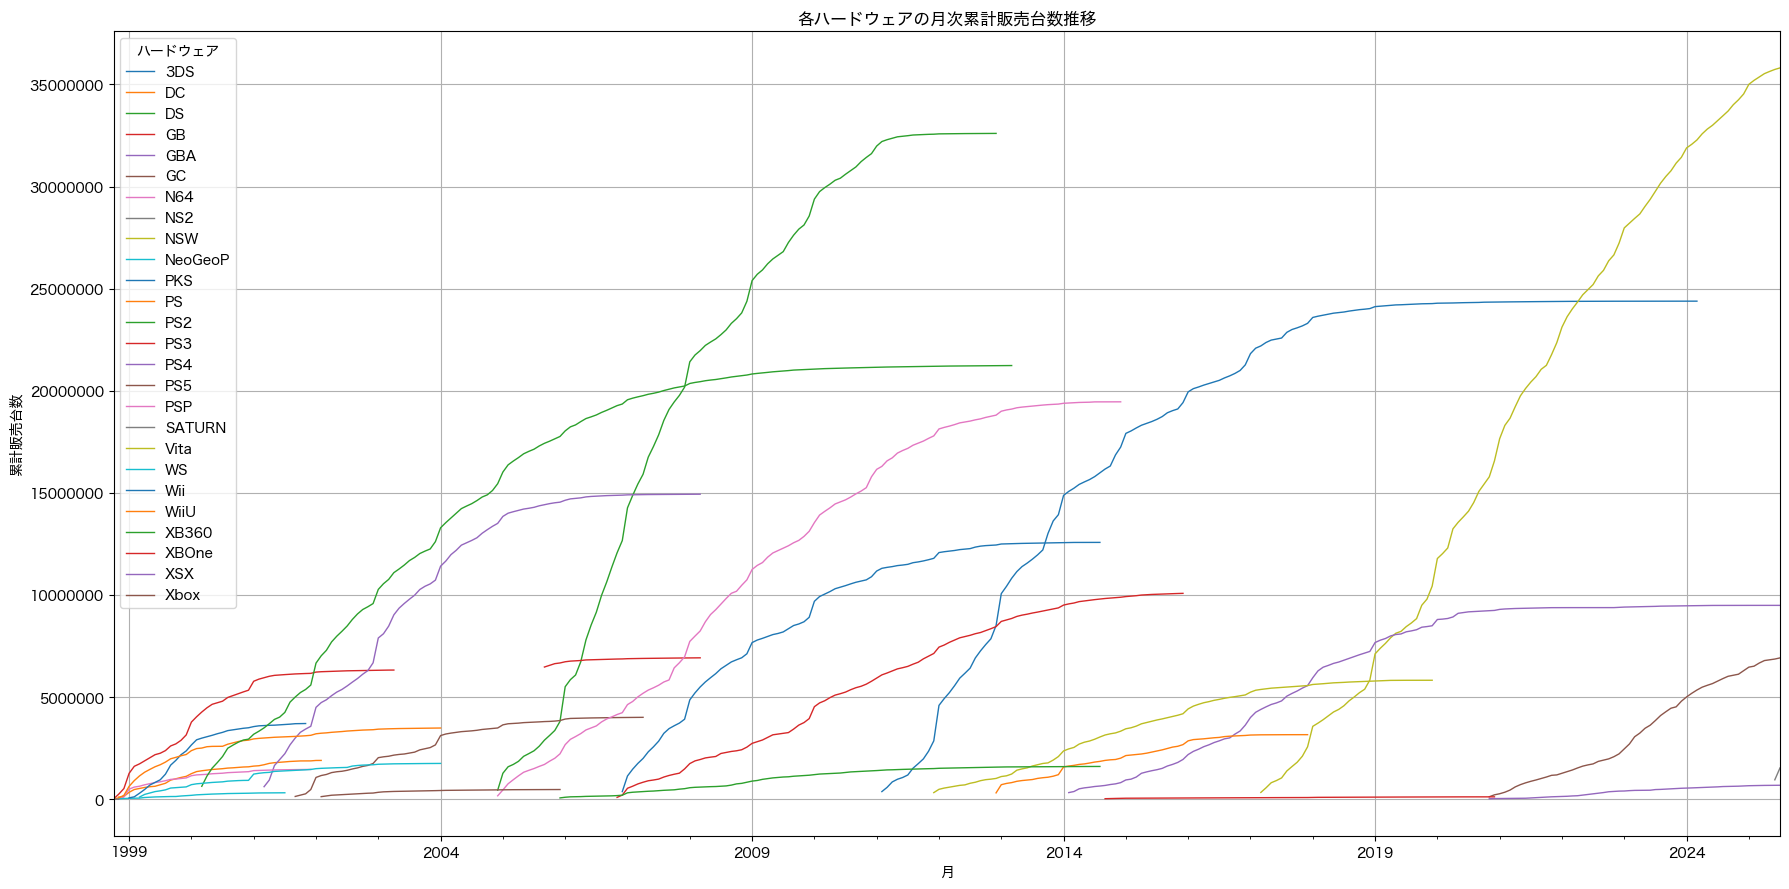

In [10]:
# pivot_all_dfを使ったグラフ描画（月次累計販売台数）
plt.figure(figsize=(18, 9))
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 折れ線グラフ
pivot_all_df.plot(
    ax=plt.gca(),
    kind='line',
    linestyle='-',
    linewidth=1
)

plt.title('各ハードウェアの月次累計販売台数推移')
plt.xlabel('月')
plt.ylabel('累計販売台数')
plt.legend(title='ハードウェア')

# 縦軸の表示を指数表示から整数表示に変更
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.grid(True)
plt.tight_layout()
plt.show()